In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
pd.set_option('display.max_columns', None)

#### Análise Exploratória de Dados

In [205]:
df = pd.read_excel(r'C:\Nucleo_IA\COVID\ML\dataset.xlsx')

In [206]:
df.head(15)

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,antibiotico1,antibiotico2,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,1,1,0,nenhuma,x,x,4,4,x,x,x,2,"heparina 5000UI/0,25mL",x,1,NaN,NaN,8,x,4830,0.76,36,x,2,1
1,77,F,1,3,0,HAS,x,x,4,4,hidrocortisona 100mg,prednisona 20mg,x,2,"enoxaparina 40mg/0,4mL",x,1,NaN,NaN,14.7,x,5280,0.82,31,x,2,4
2,67,M,1,2,0,HAS,1,x,4,4,x,x,x,2,"heparina 5000UI/0,25mL",x,1,NaN,NaN,x,x,8650,0.72,x,x,2,1
3,51,M,1,1,0,HAS,5,x,4,1,prednisona 20mg,x,x,1,x,x,2,NaN,NaN,6.2,x,9590,x,142,x,2,1
4,51,M,1,1,0,HAS,5,x,4,1,"dexametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,2,x,x,2,NaN,NaN,32,x,4230,15.4,158,1535,1,4
5,64,F,1,1,0,HAS,x,x,4,1,x,x,x,2,"heparina 5000UI/0,25mL",x,1,NaN,NaN,4.1,1530,6430,1,52,x,2,1
6,38,M,2,1,0,renal-hd,x,x,4,1,hidrocortisona 100mg,prednisona 20mg,x,1,"heparina 5000UI/0,25mL",x,2,NaN,NaN,19.3,2380,1260,7.35,191,1021,2,1
7,37,M,1,3,0,hiv,4,x,2,4,tiamina 300mg,piridoxina 40mg,x,2,"enoxaparina 40mg/0,4mL",x,1,NaN,NaN,4.8,x,4410,0.68,31,437,2,1
8,82,F,1,1,0,HAS,4,x,4,3,x,x,x,2,"enoxaparina 40mg/0,4mL",x,1,NaN,NaN,x,x,x,x,x,x,2,4
9,45,M,1,1,0,nenhuma,x,x,3,4,x,x,x,2,"enoxaparina 40mg/0,4mL","enoxaparina 60mg/0,6mL",1,NaN,NaN,17.2,366,2790,1.08,22,x,2,1


Valores Vazios
- Deletar linhas/colunas vazias
- Deletar linhas que possuem valores vazios
- Preencher valores vazios (último valor)

In [207]:
# deletar linhas e colunas completamente vazias
# df = df.dropna(how='all', axis=1)

# deletar linhas que possuem pelo menos 1 valor vazio
# df = df.dropna()

In [208]:
# preencher com o último valor
df = df.ffill()

In [209]:
# deletar colunas incompletas
df = df.drop(columns='antibiotico1')
df = df.drop(columns='antibiotico2')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     431 non-null    int64 
 1   sexo                      431 non-null    object
 2   raca                      431 non-null    int64 
 3   tagabismo                 431 non-null    int64 
 4   dm                        431 non-null    object
 5   comorbidade1              431 non-null    object
 6   comorbidade2              431 non-null    object
 7   comorbidade3              431 non-null    object
 8   trombo_na_internacao      431 non-null    object
 9   desfecho                  431 non-null    int64 
 10  anti-inflamatorio1        431 non-null    object
 11  anti-inflamatorio2        431 non-null    object
 12  anti-inflamatorio3        431 non-null    object
 13  anti-inflamatorio_previo  431 non-null    object
 14  profilaxia_de_trombo1     

In [210]:
df.head(15)

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,1,1,0,nenhuma,x,x,4,4,x,x,x,2,"heparina 5000UI/0,25mL",x,1,8,x,4830,0.76,36,x,2,1
1,77,F,1,3,0,HAS,x,x,4,4,hidrocortisona 100mg,prednisona 20mg,x,2,"enoxaparina 40mg/0,4mL",x,1,14.7,x,5280,0.82,31,x,2,4
2,67,M,1,2,0,HAS,1,x,4,4,x,x,x,2,"heparina 5000UI/0,25mL",x,1,x,x,8650,0.72,x,x,2,1
3,51,M,1,1,0,HAS,5,x,4,1,prednisona 20mg,x,x,1,x,x,2,6.2,x,9590,x,142,x,2,1
4,51,M,1,1,0,HAS,5,x,4,1,"dexametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,2,x,x,2,32,x,4230,15.4,158,1535,1,4
5,64,F,1,1,0,HAS,x,x,4,1,x,x,x,2,"heparina 5000UI/0,25mL",x,1,4.1,1530,6430,1,52,x,2,1
6,38,M,2,1,0,renal-hd,x,x,4,1,hidrocortisona 100mg,prednisona 20mg,x,1,"heparina 5000UI/0,25mL",x,2,19.3,2380,1260,7.35,191,1021,2,1
7,37,M,1,3,0,hiv,4,x,2,4,tiamina 300mg,piridoxina 40mg,x,2,"enoxaparina 40mg/0,4mL",x,1,4.8,x,4410,0.68,31,437,2,1
8,82,F,1,1,0,HAS,4,x,4,3,x,x,x,2,"enoxaparina 40mg/0,4mL",x,1,x,x,x,x,x,x,2,4
9,45,M,1,1,0,nenhuma,x,x,3,4,x,x,x,2,"enoxaparina 40mg/0,4mL","enoxaparina 60mg/0,6mL",1,17.2,366,2790,1.08,22,x,2,1


In [211]:
view = df[['comorbidade1','comorbidade2','comorbidade3','trombo_na_internacao', 'desfecho']]
display(view)

,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,desfecho
0,nenhuma,x,x,4,4
1,HAS,x,x,4,4
2,HAS,1,x,4,4
3,HAS,5,x,4,1
4,HAS,5,x,4,1
...,...,...,...,...,...
426,HAS,x,x,4,1
427,nenhuma,x,x,4,4
428,DM,2,x,4,1
429,HAS,3,x,4,2


In [212]:
df['desfecho']==1  # DESFECHO (1-alta/ 2-UTI/ 3-óbito/4-fim isolamento/5-transf.)

0      False
1      False
2      False
3       True
4       True
       ...  
426     True
427    False
428     True
429    False
430     True
Name: desfecho, Length: 431, dtype: bool

In [213]:
df[df['desfecho']==1] # select * from df where desfecho

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
3,51,M,1,1,0,HAS,5,x,4,1,prednisona 20mg,x,x,1,x,x,2,6.2,x,9590,x,142,x,2,1
4,51,M,1,1,0,HAS,5,x,4,1,"dexametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,2,x,x,2,32,x,4230,15.4,158,1535,1,4
5,64,F,1,1,0,HAS,x,x,4,1,x,x,x,2,"heparina 5000UI/0,25mL",x,1,4.1,1530,6430,1,52,x,2,1
6,38,M,2,1,0,renal-hd,x,x,4,1,hidrocortisona 100mg,prednisona 20mg,x,1,"heparina 5000UI/0,25mL",x,2,19.3,2380,1260,7.35,191,1021,2,1
11,79,M,2,1,0,HAS,x,x,4,1,x,x,x,2,"heparina 5000UI/0,25mL",x,1,x,x,11150,0.89,53,x,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,43,F,2,1,0,nenhuma,x,x,4,1,x,x,x,2,x,x,2,x,x,x,x,x,x,2,1
425,62,F,1,1,0,nenhuma,x,x,4,1,x,x,x,2,"enoxaparina 40mg/0,4mL",x,2,x,x,6260,0.76,x,x,2,4
426,50,M,1,2,0,HAS,x,x,4,1,x,x,x,2,x,x,2,x,x,7100,1.06,28,x,2,1
428,58,M,1,2,1,DM,2,x,4,1,x,x,x,2,x,x,2,x,x,10580,1.07,29,x,2,1


#### Calculando e imprimindo histogramas sobre colunas numéricas

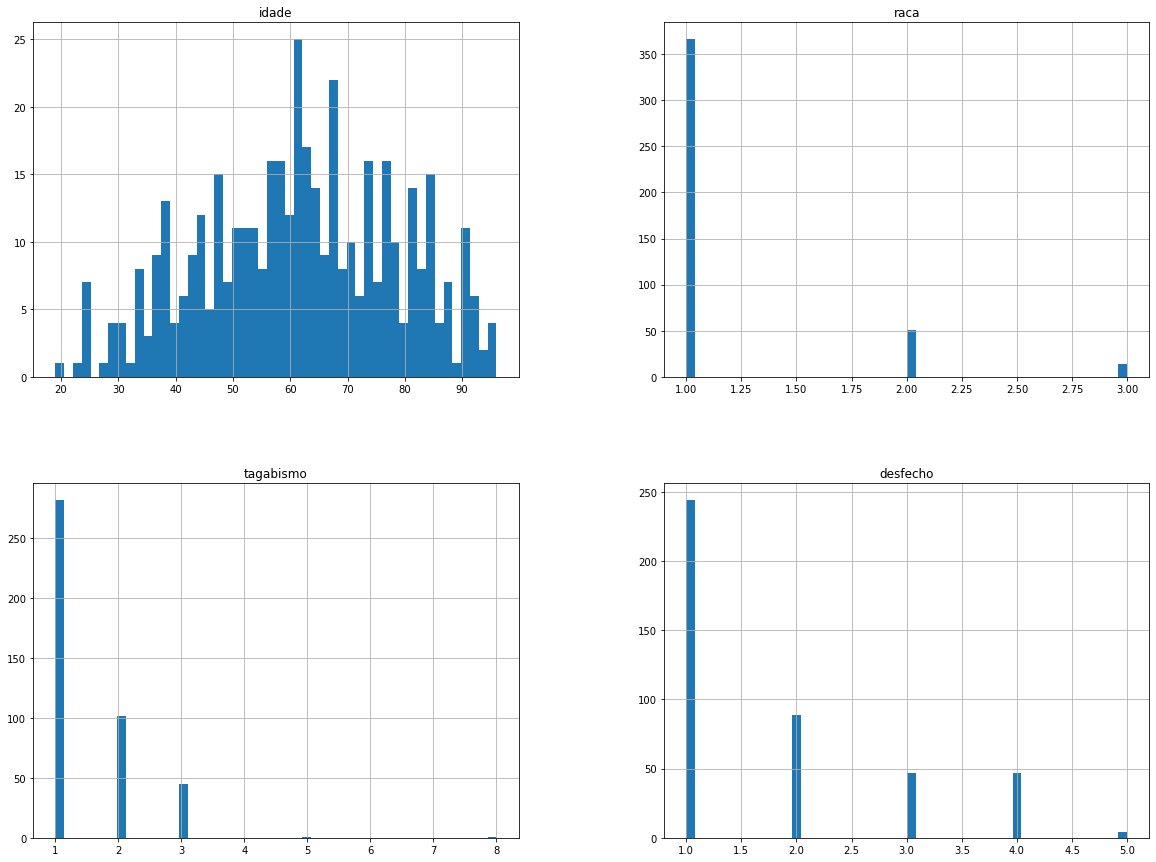

In [214]:
#%matplotlib inline # only in a Jupyter notebook
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

#### Ajustando a escala dos atributos numéricos quantitativos

In [215]:
print('Menor valor de idade: ', df['idade'].min())
print('Maior valor de idade: ', df['idade'].max())

Menor valor de idade:  19
Maior valor de idade:  96


In [216]:
df[df['proteina c (mg/dl)']=='x'] # select * from df where

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
2,67,M,1,2,0,HAS,1,x,4,4,x,x,x,2,"heparina 5000UI/0,25mL",x,1,x,x,8650,0.72,x,x,2,1
8,82,F,1,1,0,HAS,4,x,4,3,x,x,x,2,"enoxaparina 40mg/0,4mL",x,1,x,x,x,x,x,x,2,4
11,79,M,2,1,0,HAS,x,x,4,1,x,x,x,2,"heparina 5000UI/0,25mL",x,1,x,x,11150,0.89,53,x,2,4
20,63,M,2,3,1,DM,2,x,x,3,x,x,x,2,x,x,2,x,x,x,x,x,x,2,3
22,40,F,1,1,1,DM,2,5,4,1,x,x,x,x,x,x,x,x,x,x,x,x,x,2,1
26,63,F,1,1,1,DM,4,x,4,1,x,x,x,2,"heparina 5000UI/0,25mL",x,1,x,x,7280,0.64,x,x,1,1
31,63,M,2,3,0,ICC,x,x,1,5,x,x,x,x,x,x,x,x,x,x,x,x,x,x,x
50,84,M,1,2,0,HAS,4,x,4,1,prednisona 5mg,x,x,1,"heparina 5000UI/0,25mL",x,1,x,x,x,x,x,x,2,4
69,45,F,3,1,0,oncologica,x,x,4,1,"dexametasona 4mg/mL 2,5mL",x,x,1,"heparina 5000UI/0,25mL",x,1,x,x,6750,0.81,30,x,2,4
110,76,M,1,1,0,nenhuma,x,x,4,3,prednisona 20mg,x,x,2,x,x,2,x,x,x,x,x,x,1,2


In [217]:
# value counts
proteina_c = df['proteina c (mg/dl)'].value_counts()
display(proteina_c)

x       47
0.5     11
8.7      7
8.9      6
5.4      6
        ..
7.5      1
47.6     1
21.8     1
32.3     1
0.4      1
Name: proteina c (mg/dl), Length: 186, dtype: int64

In [218]:
df = df.mask(df == 'x', 0)

In [219]:
df = df.mask(df == 'X', 0)

In [220]:
proteina_c = df['proteina c (mg/dl)'].value_counts()
display(proteina_c)

0.0     47
0.5     11
8.7      7
8.9      6
5.4      6
        ..
7.5      1
47.6     1
21.8     1
32.3     1
0.4      1
Name: proteina c (mg/dl), Length: 186, dtype: int64

In [221]:
df.head(15)

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
0,41,M,1,1,0,nenhuma,0,0,4,4,0,0,0,2,"heparina 5000UI/0,25mL",0,1,8,0,4830,0.76,36,0,2,1
1,77,F,1,3,0,HAS,0,0,4,4,hidrocortisona 100mg,prednisona 20mg,0,2,"enoxaparina 40mg/0,4mL",0,1,14.7,0,5280,0.82,31,0,2,4
2,67,M,1,2,0,HAS,1,0,4,4,0,0,0,2,"heparina 5000UI/0,25mL",0,1,0,0,8650,0.72,0,0,2,1
3,51,M,1,1,0,HAS,5,0,4,1,prednisona 20mg,0,0,1,0,0,2,6.2,0,9590,0,142,0,2,1
4,51,M,1,1,0,HAS,5,0,4,1,"dexametasona 4mg/mL 2,5mL",hidrocortisona 100mg,prednisona 20mg,2,0,0,2,32,0,4230,15.4,158,1535,1,4
5,64,F,1,1,0,HAS,0,0,4,1,0,0,0,2,"heparina 5000UI/0,25mL",0,1,4.1,1530,6430,1,52,0,2,1
6,38,M,2,1,0,renal-hd,0,0,4,1,hidrocortisona 100mg,prednisona 20mg,0,1,"heparina 5000UI/0,25mL",0,2,19.3,2380,1260,7.35,191,1021,2,1
7,37,M,1,3,0,hiv,4,0,2,4,tiamina 300mg,piridoxina 40mg,0,2,"enoxaparina 40mg/0,4mL",0,1,4.8,0,4410,0.68,31,437,2,1
8,82,F,1,1,0,HAS,4,0,4,3,0,0,0,2,"enoxaparina 40mg/0,4mL",0,1,0,0,0,0,0,0,2,4
9,45,M,1,1,0,nenhuma,0,0,3,4,0,0,0,2,"enoxaparina 40mg/0,4mL","enoxaparina 60mg/0,6mL",1,17.2,366,2790,1.08,22,0,2,1


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   idade                     431 non-null    int64 
 1   sexo                      431 non-null    object
 2   raca                      431 non-null    int64 
 3   tagabismo                 431 non-null    int64 
 4   dm                        431 non-null    object
 5   comorbidade1              431 non-null    object
 6   comorbidade2              431 non-null    object
 7   comorbidade3              431 non-null    object
 8   trombo_na_internacao      431 non-null    object
 9   desfecho                  431 non-null    int64 
 10  anti-inflamatorio1        431 non-null    object
 11  anti-inflamatorio2        431 non-null    object
 12  anti-inflamatorio3        431 non-null    object
 13  anti-inflamatorio_previo  431 non-null    object
 14  profilaxia_de_trombo1     

### Pré-processamento
###### Separando um conjunto de dados para teste

In [223]:
from sklearn.model_selection import train_test_split

In [224]:
df_treino, df_teste = train_test_split(df, test_size=0.2, random_state=42)

##### Separando o atributo alvo dos atributos preditivos

In [225]:
df_treino_labels = df_treino['desfecho'].copy()
df_treino        = df_treino.drop(columns='desfecho')

In [226]:
df_treino

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
132,77,M,1,1,0,ICC,0,0,4,0,0,0,2,"heparina 5000UI/0,25mL",0,1,8.6,0,3970,1.02,133,2213,2,2
227,62,M,1,2,1,DM,0,0,4,0,0,0,2,0,0,2,1.6,0,2690,0.82,24,1078,2,4
31,63,M,2,3,0,ICC,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,74,M,1,1,0,renal-hd,0,0,4,0,0,0,2,"heparina 5000UI/0,25mL",0,1,5.4,0,11910,1.56,56,0,2,4
347,65,F,1,3,0,oncologica,0,0,4,0,0,0,2,0,0,2,6.4,0,10240,0.36,14,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,85,F,1,1,0,HAS,3,0,4,0,0,0,2,0,0,2,5.5,0,7220,0.8,34,3345,2,2
106,58,M,1,1,1,DM,3,0,4,"dexametasona 4mg/mL 2,5mL",0,0,2,0,0,2,5.4,0,7360,4.96,172,1117,2,3
270,25,F,1,1,0,nenhuma,0,0,4,0,0,0,2,"enoxaparina 40mg/0,4mL",0,2,0.5,0,7800,1.1,34,242,2,4
348,57,F,1,2,0,nenhuma,0,0,4,0,0,0,2,"enoxaparina 80mg/0,8mL",rivaroxabana 15mg,2,18.7,0,11320,1.14,30,0,2,1


In [227]:
df_teste

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,desfecho,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
423,51,M,1,1,0,nenhuma,0,0,4,1,Dexametasona 4mg cp,0,0,2,"enoxaparina 40mg/0,4mL",0,2,5.6,0,8670,1.3,35,865,2,2
75,47,M,1,1,0,nenhuma,0,0,4,1,Dexametasona 4mg cp,0,0,2,"enoxaparina 40mg/0,4mL",0,2,2.3,0,8070,1.24,39,913,2,2
296,75,F,1,1,0,HAS,0,0,4,1,"dexametasona 4mg/mL 2,5mL",0,0,2,"enoxaparina 40mg/0,4mL",0,2,5.4,0,8480,0.99,39,370,2,2
30,61,F,2,1,0,HAS,0,0,2,1,prednisona 20mg,0,0,1,"enoxaparina 60mg/0,6mL",0,1,21.7,175,5670,0.78,39,1355,2,1
362,74,M,1,2,0,HAS,4,0,4,1,Dexametasona 4mg cp,0,0,2,0,0,2,26,0,5260,0.79,32,1467,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,55,F,1,1,0,HAS,4,0,4,3,Dexametasona 4mg cp,0,0,1,"enoxaparina 40mg/0,4mL",0,1,5.4,0,2930,0.37,18,286,2,2
124,87,F,1,1,0,HAS,4,5,4,3,prednisona 20mg,"dexametasona 4mg/mL 2,5mL",0,1,"enoxaparina 40mg/0,4mL",0,1,8.1,0,24050,2.45,169,0,2,2
24,92,F,3,1,1,DM,2,5,4,2,0,0,0,2,"heparina 5000UI/0,25mL",0,1,30.7,0,6170,4.83,164,0,2,3
17,83,F,1,1,0,HAS,7,4,4,2,0,0,0,2,0,0,2,16.8,0,11440,1.4,32,2239,2,3


In [228]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [229]:
nomes_atributos_numericos = ['idade','proteina c (mg/dl)','ferritina (ng/ml)','leucócitos ( /ul)','creatinina (mg/dl)','ureia(mg/dl)','d-dimeros (ng/ml)']
atributos_numericos       = nomes_atributos_numericos
nomes_atributos           = nomes_atributos_numericos


In [230]:
nomes_atributos

['idade',
 'proteina c (mg/dl)',
 'ferritina (ng/ml)',
 'leucócitos ( /ul)',
 'creatinina (mg/dl)',
 'ureia(mg/dl)',
 'd-dimeros (ng/ml)']

In [231]:
atributos_categoricos = ['sintomas','raca','tagabismo','comorbidade1','comorbidade2','comorbidade3','trombo_na_internacao','sintomas','anti-inflamatorio_previo','anticoagulante_previo','reinfeccao']
atributos_binarios    = ['sexo']

In [232]:
# Exportando para um arquivo .csv:

In [233]:
# df.to_csv('bd.xlsx',sep=';',decimal=',')

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
scaler = StandardScaler()
scaler.fit(df_treino[atributos_numericos])

StandardScaler()

In [236]:
# scaler.mean_


In [237]:
scaler.scale_

array([  16.94056929,   10.7174983 ,  422.98749941, 4830.82242605,
          5.32337319,   52.15551525, 2118.22733457])

In [238]:
X = scaler.transform(df_treino[atributos_numericos])
X

array([[ 0.92268528, -0.15661196, -0.2855519 , ..., -0.17975794,
         1.48349325,  0.34874213],
       [ 0.03723688, -0.80974945, -0.2855519 , ..., -0.2173281 ,
        -0.60641037, -0.18708326],
       [ 0.09626677, -0.95903802, -0.2855519 , ..., -0.37136577,
        -1.06657264, -0.69599937],
       ...,
       [-2.14686918, -0.91238534, -0.2855519 , ..., -0.16472988,
        -0.41467609, -0.58175289],
       [-0.25791259,  0.78577214, -0.2855519 , ..., -0.15721584,
        -0.4913698 , -0.69599937],
       [-2.20589907,  2.11070821, -0.2855519 , ..., -0.23799169,
        -0.72145094, -0.34287391]])

In [239]:
df_treino[atributos_binarios].head()

,sexo
132,M
227,M
31,M
84,M
347,F


In [240]:
X = np.concatenate((X, df_treino[atributos_binarios]),axis=1)
X

array([[0.9226852823101308, -0.15661195599268518, -0.2855518990278652,
        ..., 1.4834932467157567, 0.3487421317919182, 'M'],
       [0.03723688046518467, -0.8097494517155568, -0.2855518990278652,
        ..., -0.6064103709401052, -0.1870832640353611, 'M'],
       [0.0962667739215144, -0.9590380221664988, -0.2855518990278652,
        ..., -1.066572635378093, -0.6959993668563365, 'M'],
       ...,
       [-2.1468691774190156, -0.9123853439005793, -0.2855518990278652,
        ..., -0.4146760940909436, -0.5817528947944849, 'F'],
       [-0.25791258681646406, 0.7857721449788866, -0.2855518990278652,
        ..., -0.49136980483060827, -0.6959993668563365, 'F'],
       [-2.2058990708753456, 2.1107082077309975, -0.2855518990278652,
        ..., -0.7214509370496022, -0.34287390775606785, 'F']],
      dtype=object)

In [241]:
nomes_atributos = np.append(nomes_atributos,atributos_binarios)
nomes_atributos

array(['idade', 'proteina c (mg/dl)', 'ferritina (ng/ml)',
       'leucócitos ( /ul)', 'creatinina (mg/dl)', 'ureia(mg/dl)',
       'd-dimeros (ng/ml)', 'sexo'], dtype='<U18')

In [242]:
df_treino.head()

,idade,sexo,raca,tagabismo,dm,comorbidade1,comorbidade2,comorbidade3,trombo_na_internacao,anti-inflamatorio1,anti-inflamatorio2,anti-inflamatorio3,anti-inflamatorio_previo,profilaxia_de_trombo1,profilaxia_de_trombo2,anticoagulante_previo,proteina c (mg/dl),ferritina (ng/ml),leucócitos ( /ul),creatinina (mg/dl),ureia(mg/dl),d-dimeros (ng/ml),reinfeccao,sintomas
132,77,M,1,1,0,ICC,0,0,4,0,0,0,2,"heparina 5000UI/0,25mL",0,1,8.6,0,3970,1.02,133,2213,2,2
227,62,M,1,2,1,DM,0,0,4,0,0,0,2,0,0,2,1.6,0,2690,0.82,24,1078,2,4
31,63,M,2,3,0,ICC,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
84,74,M,1,1,0,renal-hd,0,0,4,0,0,0,2,"heparina 5000UI/0,25mL",0,1,5.4,0,11910,1.56,56,0,2,4
347,65,F,1,3,0,oncologica,0,0,4,0,0,0,2,0,0,2,6.4,0,10240,0.36,14,0,2,4


#### Binarizando atributos categóricos (One Hot Encoding)

In [243]:
df_treino['raca'].value_counts()

1    287
2     44
3     13
Name: raca, dtype: int64

In [244]:
df_treino['anti-inflamatorio1'].value_counts()

dexametasona 4mg/mL 2,5mL                            116
0                                                    106
Dexametasona 4mg cp                                   58
prednisona 20mg                                       21
prednisona 5mg                                        18
hidrocortisona 100mg                                  11
tiamina 300mg                                          5
metilprednisolona 125mg sol.inj                        2
formoterol/budesonida                                  2
tiamina100mg/ml                                        1
cetoprofeno 100mg sol. Inj.                            1
metilprednisolona 500mg sol.inj                        1
fluticasona/umeclidinio/vilanterol 100/62,5/25mcg      1
piridoxina 40mg                                        1
Name: anti-inflamatorio1, dtype: int64

In [245]:
df_treino['comorbidade1'].value_counts()

DM            104
HAS            94
nenhuma        65
oncologica     37
obesidade      16
ICC            13
renal-hd        8
hiv             6
0               1
Name: comorbidade1, dtype: int64

In [246]:
df_treino['dm'].value_counts()

0    240
1    104
Name: dm, dtype: int64

In [247]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

In [248]:
lb_raca = LabelBinarizer()
raca = lb_raca.fit_transform(df_treino['raca'].values)
print("Classes aprendidas: ",lb_raca.classes_)
print("Primeiras 5 linhas dos dados: ")
print(raca[0:5,])

Classes aprendidas:  [1 2 3]
Primeiras 5 linhas dos dados: 
[[1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]]


In [249]:
lb_tagabismo = LabelBinarizer()
tagabismo = lb_tagabismo.fit_transform(df_treino['tagabismo'].values)
print("Classes aprendidas: ",lb_tagabismo.classes_)
print("Primeiras 5 linhas dos dados: ")
print(tagabismo[0:5,])

Classes aprendidas:  [1 2 3 5 8]
Primeiras 5 linhas dos dados: 
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]]


In [250]:
# df_treino['comorbidade1'].values

In [251]:
# lb = preprocessing.LabelBinarizer()
# lb.fit([df_treino['comorbidade1'].values])

In [252]:
df_treino['comorbidade2'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 5, 0, 0, 0, 3, 5,
       2, 7, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 4, 4, 0, 0, 2, 0, 5, 0, 0,
       0, 0, 0, 2, 1, 7, 0, 0, 2, 0, 0, 2, 2, 0, 2, 5, 0, 0, 4, 2, 2, 0,
       2, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 3, 0, 0, 2, 0, 7, 4, 0, 7, 4, 2, 5, 0, 1, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 2,
       1, 2, 7, 7, 0, 5, 0, 2, 2, 0, 0, 4, 0, 1, 3, 0, 2, 0, 0, 0, 2, 5,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 5, 0, 7, 2, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 7, 3, 0, 0, 5, 5, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 5, 0, 0, 0,
       1, 0, 0, 2, 2, 0, 6, 2, 5, 5, 0, 2, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 5, 4, 0, 7, 7, 0, 2, 5, 0, 0, 3, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       4, 3, 2, 5, 2, 2, 0, 0, 0, 0, 2, 3, 0, 0, 2, 4, 0, 0, 0, 2, 0, 4,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,

In [253]:
lb_comorbidade2 = LabelBinarizer()
comorbidade2 = lb_comorbidade2.fit_transform(df_treino['comorbidade2'].values)
print("Classes aprendidas: ",lb_comorbidade2.classes_)
print("Primeiras 5 linhas dos dados: ")
print(comorbidade2[0:5,])

ValueError: Unknown label type: (array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 5, 0, 0, 0, 3, 5,
       2, 7, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 4, 4, 0, 0, 2, 0, 5, 0, 0,
       0, 0, 0, 2, 1, 7, 0, 0, 2, 0, 0, 2, 2, 0, 2, 5, 0, 0, 4, 2, 2, 0,
       2, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 3, 0, 0, 2, 0, 7, 4, 0, 7, 4, 2, 5, 0, 1, 0,
       0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 2,
       1, 2, 7, 7, 0, 5, 0, 2, 2, 0, 0, 4, 0, 1, 3, 0, 2, 0, 0, 0, 2, 5,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 5, 0, 7, 2, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 7, 3, 0, 0, 5, 5, 0, 2, 2, 2, 0, 0, 0,
       0, 0, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 5, 0, 0, 0,
       1, 0, 0, 2, 2, 0, 6, 2, 5, 5, 0, 2, 4, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 5, 4, 0, 7, 7, 0, 2, 5, 0, 0, 3, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       4, 3, 2, 5, 2, 2, 0, 0, 0, 0, 2, 3, 0, 0, 2, 4, 0, 0, 0, 2, 0, 4,
       2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 5, 4, 4, 2, 4,
       2, 5, 3, 2, 2, 2, 0, 7, 1, 2, 2, 0, 0, 2, 4, 0, 0, 4, 4, 0, 5, 0,
       2, 0, 2, 0, 0, 7, 2, 2, 5, 3, 3, 0, 0, 0], dtype=object),)

In [ ]:
# lb_dm = LabelBinarizer()
# dm = lb_dm.fit_transform(df_treino['dm'].values)
# print("Classes aprendidas: ",lb_dm.classes_)
# print("Primeiras 5 linhas dos dados: ")
# print(dm[0:5,])